<a href="https://colab.research.google.com/github/Sharknado888/Breast-Cancer-dataset/blob/master/Untitled43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
from IPython.display import HTML
import random

In [0]:
data,label= make_blobs(n_samples=1000,centers=4,n_features=2,random_state=0)

In [0]:
labels_orig = label
label = np.mod(labels_orig, 2)

In [0]:
X_train,X_val,Y_train,Y_val=train_test_split(data,label,stratify=label,random_state=0)

In [99]:
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

(750, 2) (250, 2) (750,) (250,)


In [0]:
class NN:
  def __init__(self):
    random.seed(0)
    self.w1=np.random.randn()
    self.w2=np.random.randn()
    self.w3=np.random.randn()
    self.w4=np.random.randn()
    self.w5=np.random.randn()
    self.w6=np.random.randn()
    self.w7=np.random.randn()
    self.w8=np.random.randn()
    self.w9=np.random.randn()
    self.w10=np.random.randn()
    self.b1=0
    self.b2=0
    self.b3=0
    self.b4=0
    self.b5=0
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  def forward_pass(self,x):
    self.x1,self.x2=x
    self.a1=self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.a2=self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h1=self.sigmoid(self.a1)
    self.h2=self.sigmoid(self.a2)
    self.a3=self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4=self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.h3=self.sigmoid(self.a3)
    self.h4=self.sigmoid(self.a4)
    self.a5=self.w9*self.h3 + self.w10*self.h4 + self.b5
    self.h5=self.sigmoid(self.a5)
    return self.h5
  
  def grad(self,x,y):
    self.forward_pass(x)
    
    self.da5=(self.h5-y)*self.h5*(1-self.h5)
    
    self.dw9=self.da5*self.h3
    self.dw10=self.da5*self.h4
    self.db5=self.da5
    
    self.da3= (self.dw9/(self.h3))*(self.w9)*(self.h3)*(1-self.h3)
    self.da4= (self.dw10/(self.h4))*(self.w10)*(self.h4)*(1-self.h4)
    
    self.dw5=self.da3*self.h1
    self.dw6=self.da3*self.h2
    self.db3=self.a3
    self.dw7=self.da4*self.h1
    self.dw8=self.da4*self.h2
    self.db4=self.a4
    
    
    self.da1=(((self.dw5/(self.h1))*self.w5) + ((self.dw7/(self.h1))*self.w7))*(self.h1)*(1-self.h1)
    self.da2=(((self.dw6/(self.h2))*self.w6) + ((self.dw8/(self.h2))*self.w8))*(self.h2)*(1-self.h2)
    
    self.dw1=self.da1*self.x1
    self.dw2=self.da1*self.x2
    self.db1=self.a1
    self.dw3=self.da2*self.x1
    self.dw4=self.da2*self.x2
    self.db2=self.a2
    
    
  def fit(self,X,Y,epochs=1,learning_rate=1,initialise=True,display_loss=False,display_weight=False):
    if initialise:
      self.w1=np.random.randn()
      self.w2=np.random.randn()
      self.w3=np.random.randn()
      self.w4=np.random.randn()
      self.w5=np.random.randn()
      self.w6=np.random.randn()
      self.w7=np.random.randn()
      self.w8=np.random.randn()
      self.w9=np.random.randn()
      self.w10=np.random.randn()
      self.b1=0
      self.b2=0
      self.b3=0
      self.b4=0
      self.b5=0
      
    if display_loss:
      loss={}
      w1 = {}
      w2 = {}
      w3 = {}
      w4 = {}
      w5 = {}
      
    for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
      dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,dw10,db1,db2,db3,db4,db5=[0]*15
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db5 += self.db5
        
      m=X.shape[0]
      self.w1 -= learning_rate*dw1/m
      self.w2 -= learning_rate*dw2/m
      self.w3 -= learning_rate*dw3/m
      self.w4 -= learning_rate*dw4/m
      self.w5 -= learning_rate*dw5/m
      self.w6 -= learning_rate*dw6/m
      self.w7 -= learning_rate*dw7/m
      self.w8 -= learning_rate*dw8/m
      self.w9 -= learning_rate*dw9/m
      self.w10 -= learning_rate*dw10/m
      self.b1 -= learning_rate*db1/m
      self.b2 -= learning_rate*db2/m
      self.b3 -= learning_rate*db3/m
      self.b4 -= learning_rate*db4/m
      self.b5 -= learning_rate*db5/m
      
      if display_loss:
        y_pred=self.predict(X)
        loss[i]=mean_squared_error(y_pred,Y)
      if display_weight:
        weights=np.array([[0,0,self.b5,self.w9,self.w10,0],[self.b3,self.w5,self.w6,self.b4,self.w7,self.w8],[self.b1,self.w1,self.w2,self.b2,self.w3,self.w4]])
        weight_matrix.append(weights)
        w1[i] = self.w1
        w2[i] = self.w2
        w3[i] = self.w3
        w4[i] = self.w4
        w5[i] = self.w5
        
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
    if display_loss:
      plt.tight_layout()
      
      plt.subplot(5,1,1)
      plt.plot(w1.values())
      plt.xlabel('Epochs')
      plt.ylabel('W1')
      
      plt.subplot(5,1,2)
      plt.plot(w2.values())
      plt.xlabel('Epochs')
      plt.ylabel('W2')
      
      plt.subplot(5,1,3)
      plt.plot(w3.values())
      plt.xlabel('Epochs')
      plt.ylabel('W3')
      
      plt.subplot(5,1,4)
      plt.plot(w3.values())
      plt.xlabel('Epochs')
      plt.ylabel('W4')
      
      plt.subplot(5,1,5)
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      
      plt.show()  
  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)
      
 
  def predict_h1(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h1)
    return np.array(Y_pred)
      
  def predict_h2(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h2)
    return np.array(Y_pred)
     
  def predict_h3(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h3)
    return np.array(Y_pred)
    
  def predict_h4(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h4)
    return np.array(Y_pred)
     
  def predict_h5(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h5)
    return np.array(Y_pred)

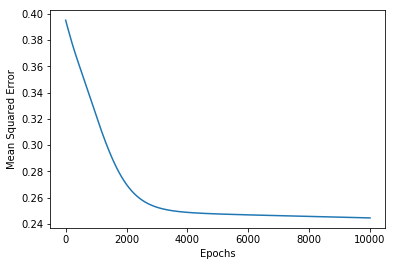

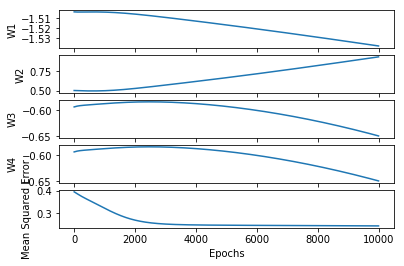

In [105]:
weight_matrix = []
ffn = NN()
ffn.fit(X_train, Y_train, epochs=10000, learning_rate=0.01, display_loss=True, display_weight=True)

True

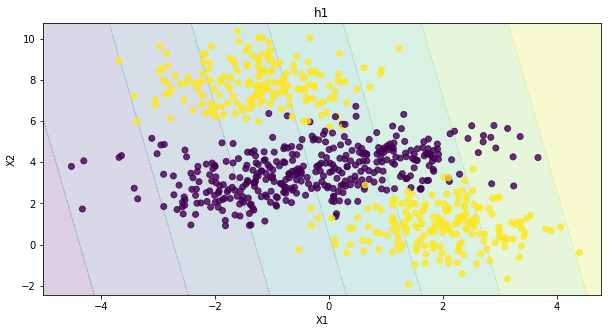

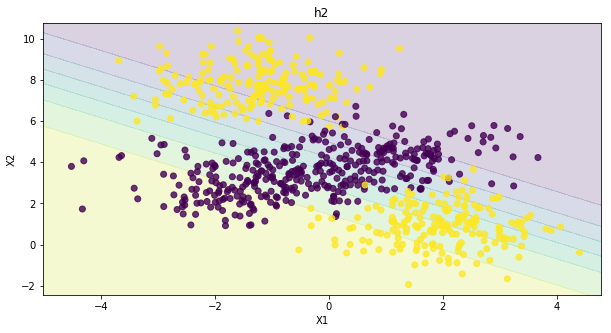

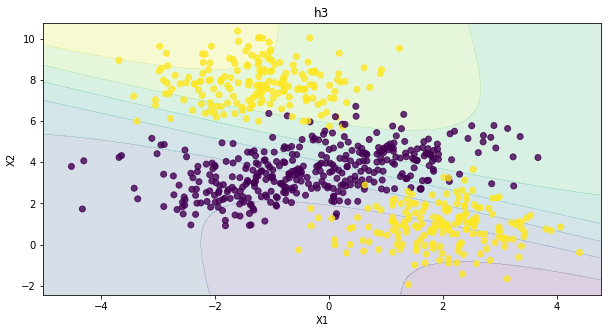

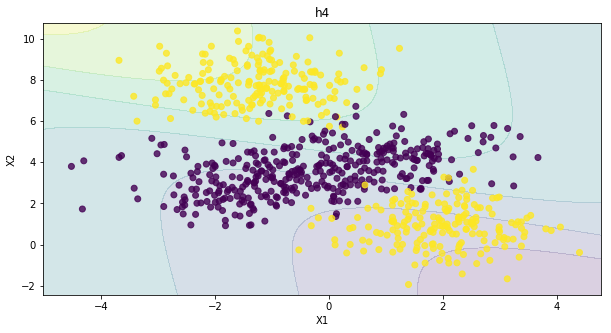

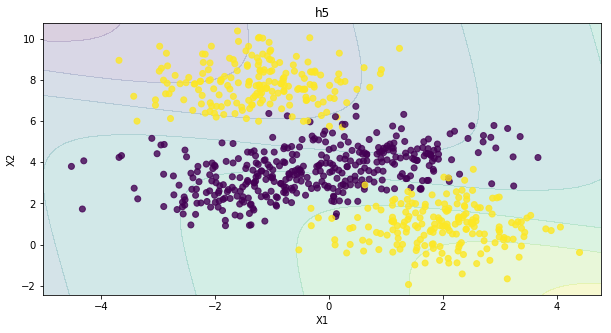

In [102]:
def make_meshgrid(x, y, h=.2):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
  
def plot_contours(ax, predict, xx, yy, **params):
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
  
def plot_boundary():
    xx, yy = make_meshgrid(X_train[:,0], X_train[:,1])
    predict_functions = [ffn.predict_h1, ffn.predict_h2, ffn.predict_h3, ffn.predict_h4, ffn.predict_h5]
    
    for i in range(5):

      fig, ax = plt.subplots(figsize=(10,5))

      plot_contours(ax, predict_functions[i], xx, yy, alpha=0.2)
      ax.scatter(X_train[:,0], X_train[:,1], c=Y_train, alpha=0.8)
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xlabel('X1')
      ax.set_ylabel('X2')
      ax.set_title("h"+str(i+1))
      
    return True
  
plot_boundary()

In [0]:
def plot_heat_map(epoch):
    fig = plt.figure(figsize=(10, 1))
    sns.heatmap(weight_matrix[epoch], annot=True, vmin=-3, vmax=3)
    plt.title("Epoch "+str(epoch))

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


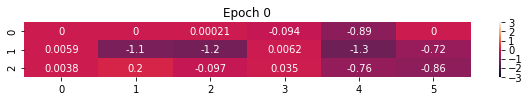

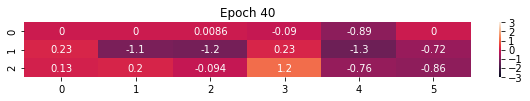

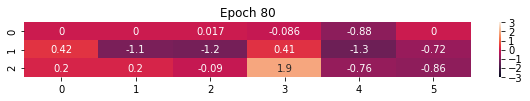

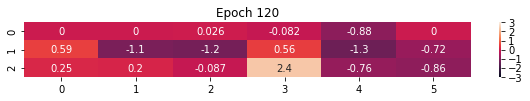

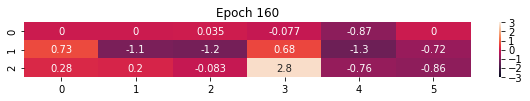

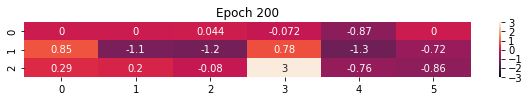

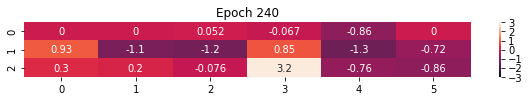

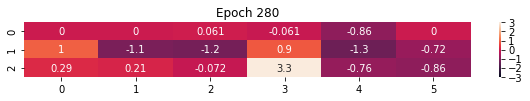

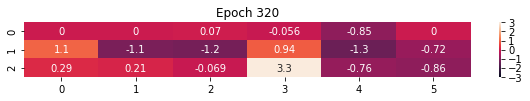

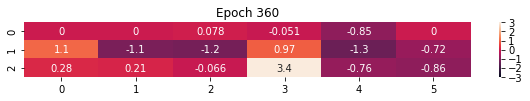

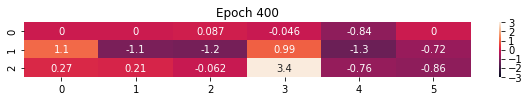

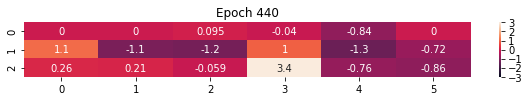

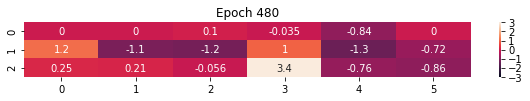

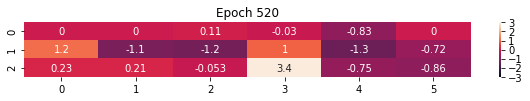

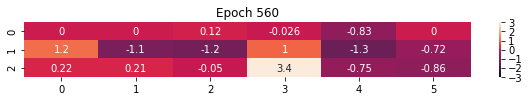

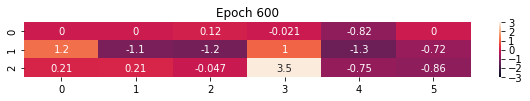

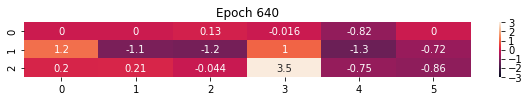

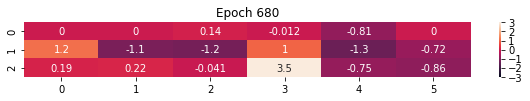

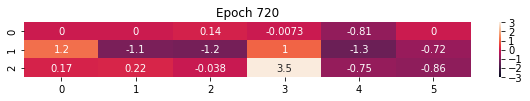

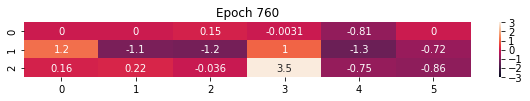

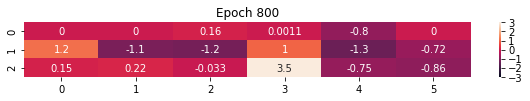

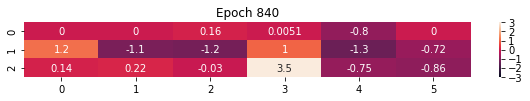

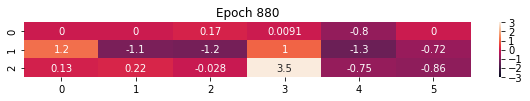

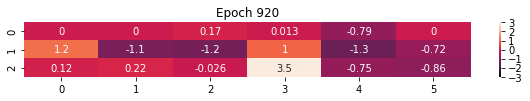

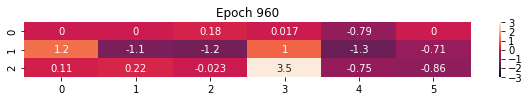

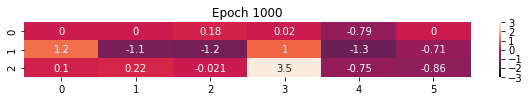

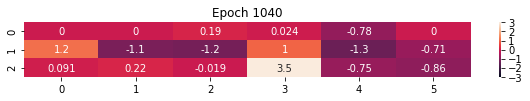

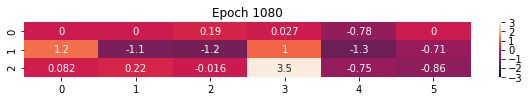

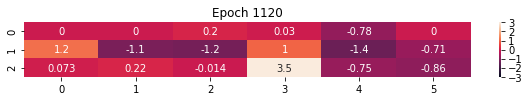

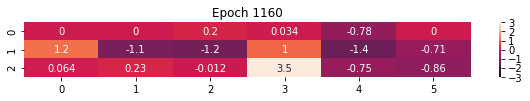

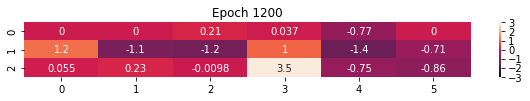

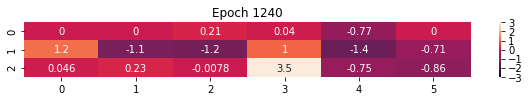

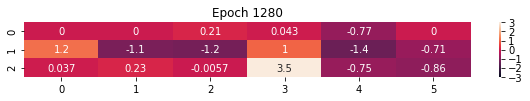

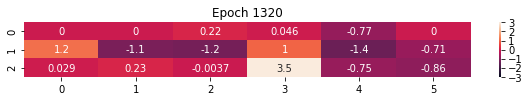

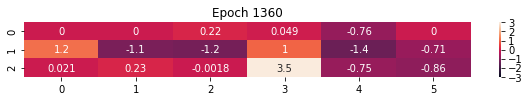

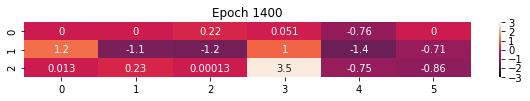

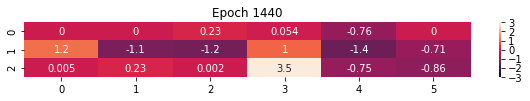

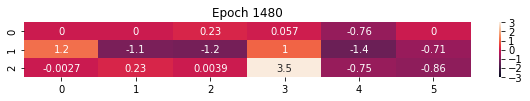

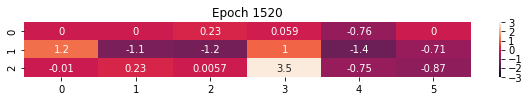

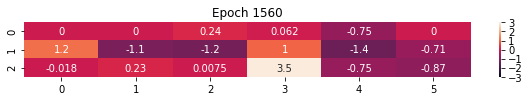

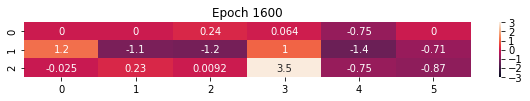

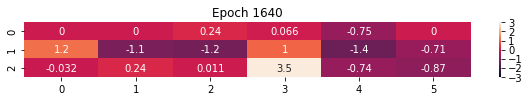

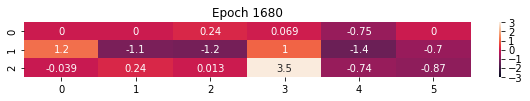

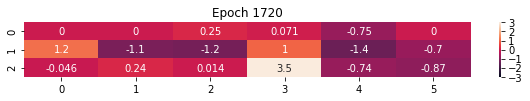

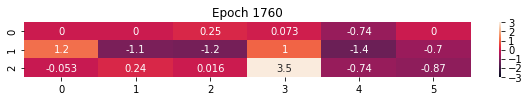

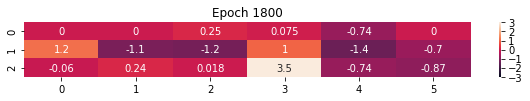

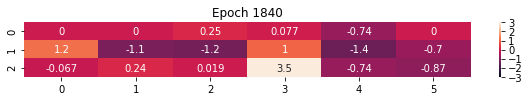

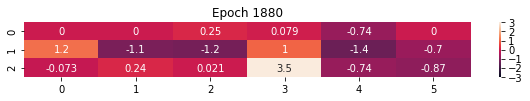

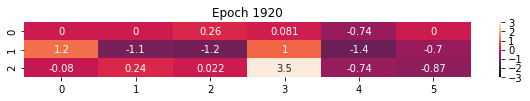

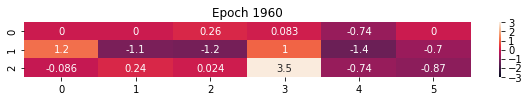

In [104]:
imageio.mimsave('./weights_viz.gif', [plot_heat_map(i) for i in range(0,len(weight_matrix),len(weight_matrix)//50)], fps=1)